In [1]:
import pandas as pd
import networkx as nx

## Loading Twitter data

In [2]:
mydata = pd.read_excel("Twitter_data.xlsx", index_col=0)
mydata

,id,author_id,created_at,text,retweet_count,reply_count,like_count,quote_count,username,follower_count,following_count
0,1477769524011315210,826104766161879044,2022-01-02T22:31:24.000Z,@Iovehearts is it a pension scheme with your e...,0,1,0,0,_postpunkdad,674,414
1,1477750903025319937,1433581386112380932,2022-01-02T21:17:25.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,Missy41091460,3,29
2,1477743788793778179,1273894620,2022-01-02T20:49:09.000Z,RT @PRSA_Roadsafety: Let be honest PSV drivers...,4,0,0,0,kiela_w,921,782
3,1477740238323789831,19198704,2022-01-02T20:35:02.000Z,"You’ve heard of the “Great Resignation,” but a...",0,0,2,0,PRSASacramento,2405,1522
4,1477737600479866884,948674925950328833,2022-01-02T20:24:33.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,EliasZakayo300,400,1640
...,...,...,...,...,...,...,...,...,...,...,...
81,1477119968584126464,18586040,2022-01-01T03:30:18.000Z,[USA] Public Relations Sr. Advisor for Infrast...,0,0,0,0,pr_jobs,5833,3295
82,1477100493830864903,436045478,2022-01-01T02:12:55.000Z,RT @DWJr16: It has been my honor to serve as 2...,1,0,0,0,PRSAHealth,2293,1582
83,1477098881880055814,1049005198860009473,2022-01-01T02:06:31.000Z,It has been my honor to serve as 2021 @PRSAHea...,1,0,4,0,DWJr16,146,1135
84,1477095571777155073,9745402,2022-01-01T01:53:22.000Z,"RT @PRSA: As we close out 2021, we want to tak...",5,0,0,0,alaskaegan,498,437


## Relationship data
If you want retweet relationships, replace the regular expression in the first line in the below code with r"RT @([A-Za-z]+[A-Za-z0-9-_]+)" In that case, the dataframe indicate that users in the from column retweet posts generated by user b in the to column.

### Mentions network

In [8]:
mention_list = mydata.text.str.extractall(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)")
mention_list = mention_list.reset_index().rename(columns = {"level_0": "index1", 
                                                            "match": "index2",
                                                            0: "mentioned"})
mention_df = mention_list.merge(mydata['username'], left_on="index1", right_index=True)
mention_df = mention_df.rename(columns = {"username": "from", 
                                          "mentioned": "to"})
mention_df = mention_df[["from", "to"]]
mention_df

,from,to
0,_postpunkdad,Iovehearts
1,Missy41091460,AccidentAlert_K
2,Missy41091460,sikikasafety
3,Missy41091460,road_driving
4,Missy41091460,ntsa_kenya
...,...,...
158,PRSAHealth,LinkedIn
159,DWJr16,PRSAHealth
160,DWJr16,PRSA
161,DWJr16,LinkedIn


### Retweets network

In [9]:
retweet_list = mydata.text.str.extractall(r"RT @([A-Za-z]+[A-Za-z0-9-_]+)")
retweet_list = retweet_list.reset_index().rename(columns = {"level_0": "index1", 
                                                            "match": "index2",
                                                            0: "mentioned"})
retweet_df = retweet_list.merge(mydata['username'], left_on="index1", right_index=True)
retweet_df = retweet_df.rename(columns = {"username": "from", 
                                          "mentioned": "to"})
retweet_df = retweet_df[["from", "to"]]
retweet_df

,from,to
0,kiela_w,PRSA_Roadsafety
1,JesseKenya,PRSA_Roadsafety
2,HiringCare,careersingov
3,Mwirigi,PRSA_Roadsafety
4,RodgersRuthugua,PRSA_Roadsafety
5,PRSAGoldCoast,PRSA
6,othatnikkiyoung,PRSA
7,PRSA_SA,PRSA
8,JazzyMatharu,PRSA_Roadsafety
9,Okami_mxsamurai,usakenshin


## Network object generator

In [10]:
G = nx.from_pandas_edgelist(mention_df, source = "from", target = "to")

## Examining elements of a graph object

For brief tutorial of NetworkX in Python, see at https://networkx.org/documentation/stable/tutorial.html

In [11]:
list(G.nodes) # node list
list(G.edges) # edge list

[('_postpunkdad', 'Iovehearts'),
 ('Missy41091460', 'AccidentAlert_K'),
 ('Missy41091460', 'sikikasafety'),
 ('Missy41091460', 'road_driving'),
 ('Missy41091460', 'ntsa_kenya'),
 ('Missy41091460', 'TIPSIKenya'),
 ('Missy41091460', 'PRSA_Roadsafety'),
 ('Missy41091460', 'motoristsoffice'),
 ('Missy41091460', 'NyanzaTraffic'),
 ('Missy41091460', 'NorthernCoridor'),
 ('Missy41091460', 'KTA_Kenya'),
 ('AccidentAlert_K', 'EliasZakayo300'),
 ('AccidentAlert_K', 'papafavour'),
 ('AccidentAlert_K', 'kipepeo75'),
 ('AccidentAlert_K', 'othigomartin'),
 ('AccidentAlert_K', 'lepolos1'),
 ('AccidentAlert_K', 'PRSA_Roadsafety'),
 ('AccidentAlert_K', 'ValentineMwamb3'),
 ('AccidentAlert_K', 'alex_ngaira'),
 ('AccidentAlert_K', 'mgmulama'),
 ('sikikasafety', 'EliasZakayo300'),
 ('sikikasafety', 'papafavour'),
 ('sikikasafety', 'kipepeo75'),
 ('sikikasafety', 'ValentineMwamb3'),
 ('sikikasafety', 'alex_ngaira'),
 ('sikikasafety', 'right_ke'),
 ('sikikasafety', 'mgmulama'),
 ('road_driving', 'EliasZakay

## Visualization

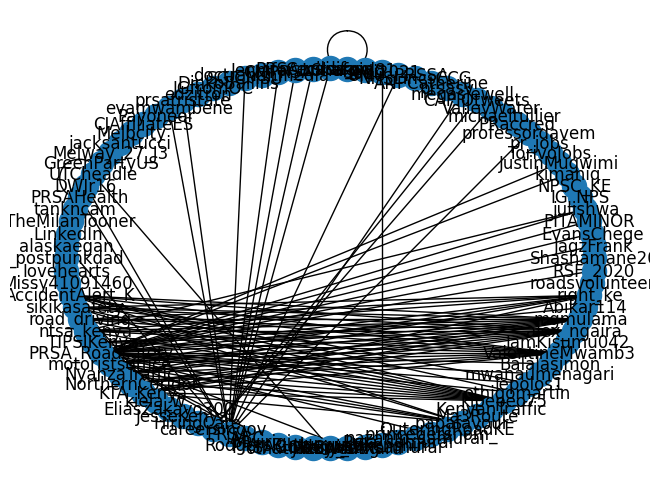

In [12]:
nx.draw_shell(G, with_labels=True)

## Centrality

### Degree centrality

In [15]:
deg_centrality = nx.degree_centrality(G)
deg_centrality = pd.DataFrame.from_dict(deg_centrality, orient='index').rename({0: "degree_centarlity"}, axis = 1).sort_values(by=['degree_centarlity'], ascending=False)
deg_centrality

,degree_centarlity
PRSA_Roadsafety,0.294737
PRSA,0.178947
mgmulama,0.115789
ValentineMwamb3,0.115789
alex_ngaira,0.115789
...,...
kimaniq,0.010526
JustinMugwimi,0.010526
TorivoJobs,0.010526
pr_jobs,0.010526


### Betweenness centrality

In [16]:
bet_centrality = nx.degree_centrality(G)
bet_centrality = pd.DataFrame.from_dict(bet_centrality, orient='index').rename({0: "between_centarlity"}, axis = 1).sort_values(by=['between_centarlity'], ascending=False)
bet_centrality

,between_centarlity
PRSA_Roadsafety,0.294737
PRSA,0.178947
mgmulama,0.115789
ValentineMwamb3,0.115789
alex_ngaira,0.115789
...,...
kimaniq,0.010526
JustinMugwimi,0.010526
TorivoJobs,0.010526
pr_jobs,0.010526


## Transforming network data into excel for Gephi

In [17]:
Gephi_df = mention_df.groupby(['from', 'to']).size().to_frame().reset_index().rename(
    columns={"from": "source",
             "to": "target",
             0:"n"})
Gephi_df.to_excel("Gephi_df.xlsx") # save the Gephi format object as an excel file
Gephi_df

,source,target,n
0,ANPCatherine,NHSLincsCCG,1
1,Abikar114,PRSA_Roadsafety,1
2,AccidentAlert_K,PRSA_Roadsafety,1
3,Balalasimon,PRSA_Roadsafety,1
4,CMPRSA,PRSA,1
...,...,...,...
149,tankncam,TheMilanTooner,1
150,ufgirl81,prsa_pag,1
151,usakenshin,Prsa_samurai,2
152,usakenshin,Sedi2021,1


### Loading the file on Gephi
On Gephi, file -> import spreadsheet -> open excel file (Gephi_df.xlsx) -> import as "Edges table" in general excel options -> finish -> ok